In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Cargar dataset preparado previamente
df_partidos = pd.read_csv('partidos_cebollitas.csv')    
df_partidos.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML


In [6]:
#Aplicar normalizacion a tiros al arco ( aprox 0-15 tiros)
scaler_norm = MinMaxScaler()
df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])

df_partidos[['tiros_arco_local', 'tiros_arco_local_norm', 'tiros_arco_visitante', 'tiros_arco_visitante_norm']].head(10)

,tiros_arco_local,tiros_arco_local_norm,tiros_arco_visitante,tiros_arco_visitante_norm
0,12,1.000000,6,0.333333
1,12,1.000000,3,0.000000
2,10,0.777778,7,0.444444
3,3,0.000000,3,0.000000
4,7,0.444444,12,1.000000
5,8,0.555556,11,0.888889
6,4,0.111111,8,0.555556
7,5,0.222222,5,0.222222
8,9,0.666667,9,0.666667
9,10,0.777778,7,0.444444


In [8]:
#Aplicar Estadarizacon a la posesion (%)
scaler_std = StandardScaler()

df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

df_partidos[['posesion_local (%)', 'posesion_local_std', 'posesion_visitante (%)', 'posesion_visitante_std']].head(10)

,posesion_local (%),posesion_local_std,posesion_visitante (%),posesion_visitante_std
0,54,0.624415,46,-0.624415
1,60,1.623479,40,-1.623479
2,55,0.790926,45,-0.790926
3,57,1.123947,43,-1.123947
4,52,0.291394,48,-0.291394
5,60,1.623479,40,-1.623479
6,49,-0.208138,51,0.208138
7,56,0.957436,44,-0.957436
8,60,1.623479,40,-1.623479
9,43,-1.207202,57,1.207202


Text(0.5, 1.0, 'Tiros al Arco Visitante (Normalizado)')

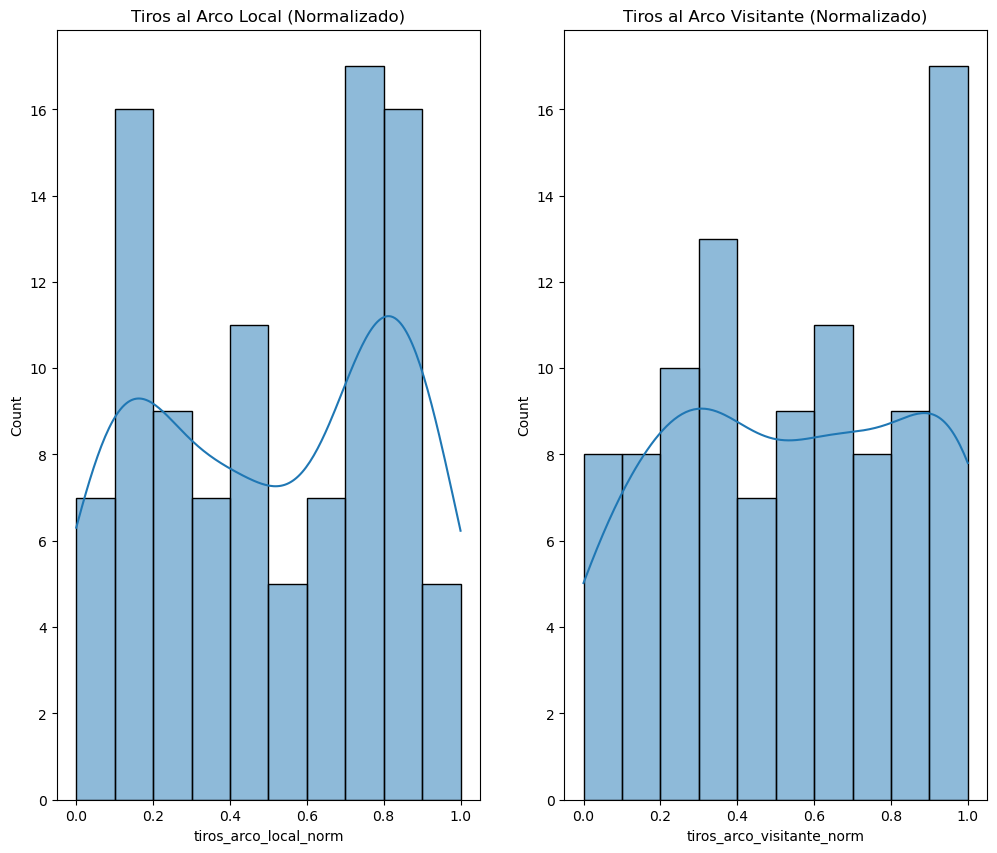

In [ ]:
#Visualizar histogramas de Tiros al arco normalizados
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
#Visualizar tiros alarco (Normalizacion)
sns.histplot(df_partidos['tiros_arco_local_norm'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Tiros al Arco Local (Normalizado)')
sns.histplot(df_partidos['tiros_arco_visitante_norm'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Tiros al Arco Visitante (Normalizado)')

Text(0.5, 1.0, 'Posesion Visitante (Estandarizado)')

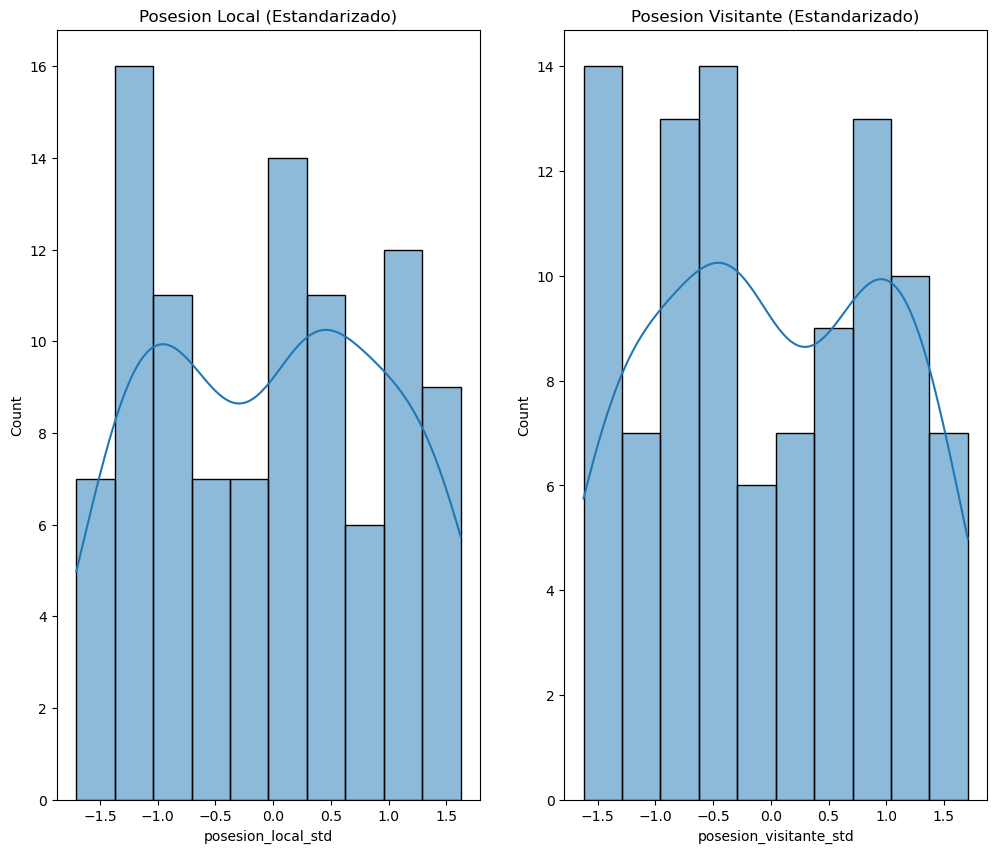

In [15]:
#Visualizar histogramas de posesion estandarizada
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
#Visualizar posesion (Estandarizacion)
sns.histplot(df_partidos['posesion_local_std'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Posesion Local (Estandarizado)')
sns.histplot(df_partidos['posesion_visitante_std'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Posesion Visitante (Estandarizado)')

